# Customer Churn Analysis

## Introduction
This notebook aims to analyze customer churn data using various machine learning techniques. 
Customer churn refers to when customers stop doing business with a company, and understanding 
the factors contributing to churn is crucial for improving customer retention.

### Importing Required Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No null value is present in the dataset

## Dropping Irrelevant Features

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Here 'RowNumber', 'CustomerId', 'Surname' are unique identifiers for each row in the table.So removing it.

In [9]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h1>Outlier Analysis<h1>

In [11]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))
outlier_rows = df[outliers.any(axis=1)]
print(outlier_rows)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
7             376   Germany  Female   29       4  115046.74              4   
58            511     Spain  Female   66       4       0.00              1   
70            738   Germany    Male   58       2  133745.44              4   
85            652     Spain  Female   75      10       0.00              2   
104           670     Spain  Female   65       1       0.00              1   
...           ...       ...     ...  ...     ...        ...            ...   
9753          656   Germany    Male   68       7  153545.11              1   
9765          445    France    Male   64       2  136770.67              1   
9832          595   Germany  Female   64       2  105736.32              1   
9894          521    France  Female   77       6       0.00              2   
9936          609    France    Male   77       1       0.00              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
7   

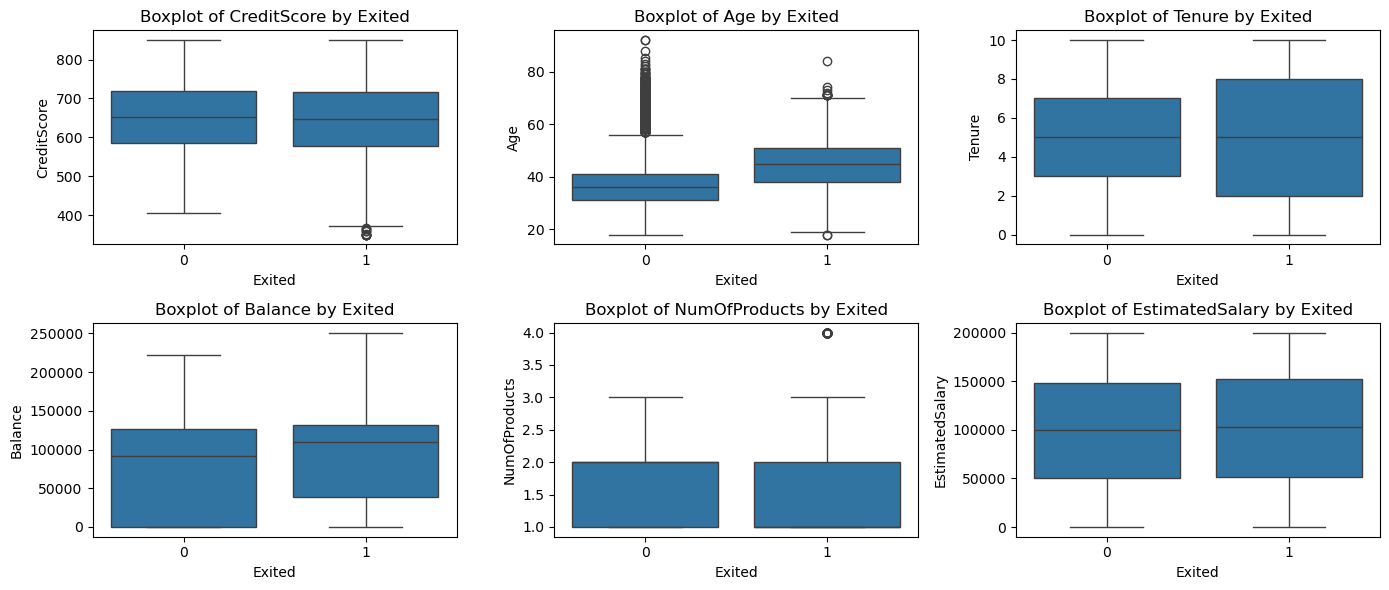

In [12]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(14, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Adjust layout for better visibility
    sns.boxplot(x='Exited', y=column, data=df)
    plt.title(f"Boxplot of {column} by Exited")
plt.tight_layout()
plt.show()

## Encoding Categorical Data

In [13]:
df = pd.get_dummies(df,drop_first = True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


<h1>Correlational Analysis</h1>

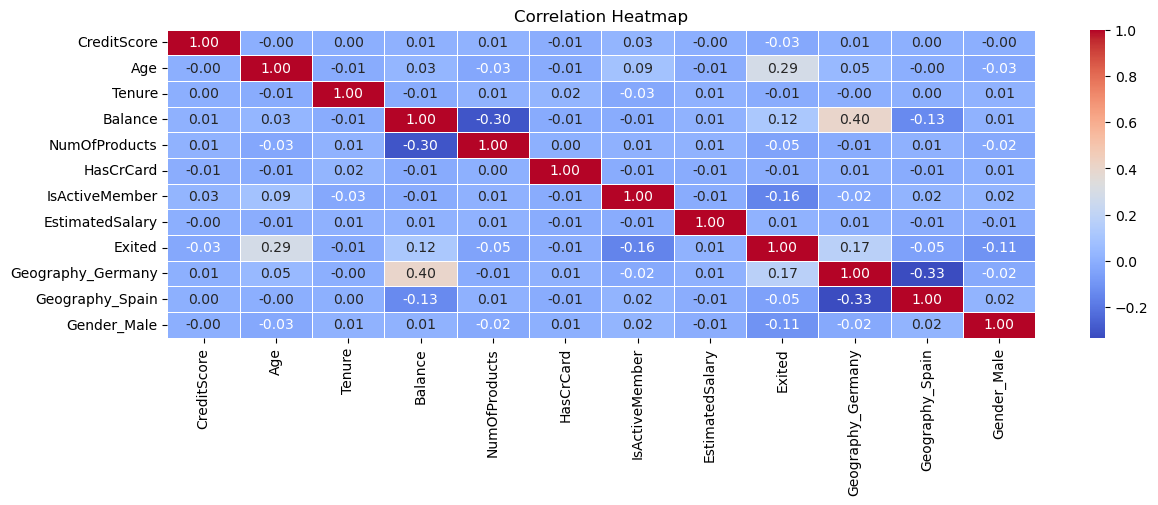

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Some insights about the target variable 

<AxesSubplot:xlabel='Exited', ylabel='count'>

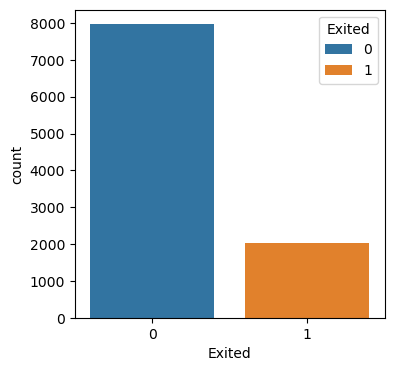

In [16]:
plt.figure(figsize=(4,4))
sns.countplot(x='Exited', data=df,hue=df['Exited'])

Data is highly imbalanced , with a large number of negative samples and a small number of positive samples. This can lead to biased models that perform well on the majority class (negative samples) but poorly on the minority class (positive class). To address this, we are using technique SMOTE for oversampling the minority class

In [17]:
X = df.drop('Exited',axis=1)
y = df['Exited']

## Handling Imbalanced Data with SMOTE

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [20]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

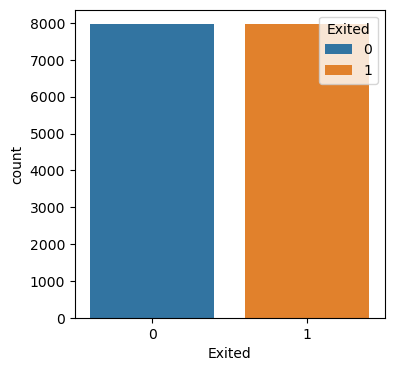

In [21]:
plt.figure(figsize=(4,4))
sns.countplot(x=y_res,hue=y_res)

<h1>Correlation After performing SMOTE</h1>

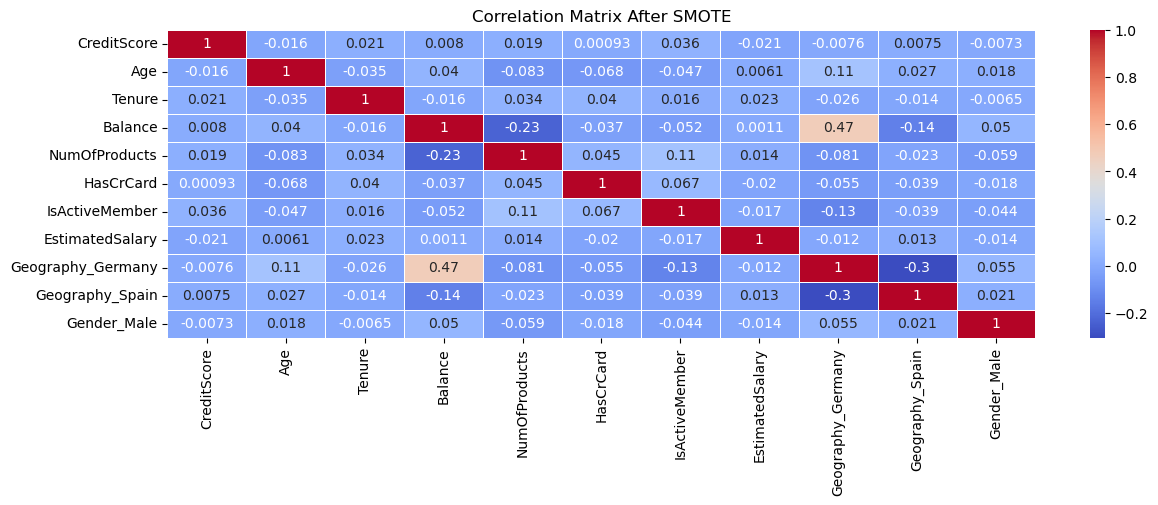

In [22]:
correlation_matrix = pd.DataFrame(X_res).corr()
#print(correlation_matrix)
plt.figure(figsize=(14, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix After SMOTE")
plt.show()

In [23]:
X_res

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000000,1,1,1,101348.880000,False,False,False
1,608,41,1,83807.860000,1,0,1,112542.580000,False,True,False
2,502,42,8,159660.800000,3,1,0,113931.570000,False,False,False
3,699,39,1,0.000000,2,0,0,93826.630000,False,False,False
4,850,43,2,125510.820000,1,1,1,79084.100000,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
15921,650,39,7,144372.295909,1,1,0,73972.575677,True,False,False
15922,626,38,2,91669.891382,2,0,0,10906.261913,True,False,False
15923,771,59,4,86001.811734,1,1,0,74178.731178,False,True,True
15924,611,49,6,120717.319247,1,0,0,6586.822450,True,False,False


In [24]:
y_res

0        1
1        0
2        1
3        0
4        0
        ..
15921    1
15922    1
15923    1
15924    1
15925    1
Name: Exited, Length: 15926, dtype: int64

## Splitting The Dataset into Training Set and Test Set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=42)

## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train

array([[-1.0113442 , -0.3037299 ,  1.1795274 , ..., -0.75122689,
         1.5587329 ,  0.80903983],
       [-1.04424747, -0.4041847 ,  0.44412664, ...,  1.33115575,
         1.5587329 ,  0.80903983],
       [ 0.95188415,  0.1985441 ,  1.54722778, ..., -0.75122689,
        -0.64154673,  0.80903983],
       ...,
       [ 0.20607673,  0.1985441 ,  1.1795274 , ..., -0.75122689,
        -0.64154673,  0.80903983],
       [-2.03134552,  0.3994537 ,  0.44412664, ...,  1.33115575,
        -0.64154673,  0.80903983],
       [ 0.53510942,  1.0021825 , -1.39437525, ...,  1.33115575,
        -0.64154673,  0.80903983]])

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def accuracy_score_manual(y_true, y_pred):
    correct = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred))
    return correct / len(y_true)

def precision_score_manual(y_true, y_pred):
    tp = sum(y_t == 1 and y_p == 1 for y_t, y_p in zip(y_true, y_pred))
    fp = sum(y_t == 0 and y_p == 1 for y_t, y_p in zip(y_true, y_pred))
    return tp / (tp + fp) if (tp + fp) > 0 else 0.0

def recall_score_manual(y_true, y_pred):
    tp = sum(y_t == 1 and y_p == 1 for y_t, y_p in zip(y_true, y_pred))
    fn = sum(y_t == 1 and y_p == 0 for y_t, y_p in zip(y_true, y_pred))
    return tp / (tp + fn) if (tp + fn) > 0 else 0.0

def f1_score_manual(y_true, y_pred):
    precision = precision_score_manual(y_true, y_pred)
    recall = recall_score_manual(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score_manual(y_true, y_pred)
    precision = precision_score_manual(y_true, y_pred)
    recall = recall_score_manual(y_true, y_pred)
    f1 = f1_score_manual(y_true, y_pred)

    print("Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return accuracy, precision, recall, f1

# evaluate_model(y_test, y_pred1)

## Logistic Regression

In [30]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic regression function using gradient ascent
def logistic_regression(x_train, y_train, epsilon=0.01, learn_rate=0.01, max_iter=1000):
    # Add a column of ones to x_train for the intercept term
    x_train = np.column_stack((np.ones(x_train.shape[0]), x_train))
    # Initialize beta (coefficients) with zeros
    beta = np.zeros(x_train.shape[1])
    n = len(y_train)

    for i in range(max_iter):
        # Linear combination of inputs and weights
        linear_combination = np.dot(x_train, beta)
        # Predicted probabilities using the sigmoid function
        y_pred = sigmoid(linear_combination)
        # Compute the gradient
        gradient = np.dot(x_train.T, (y_train - y_pred)) / n
        # Update beta using gradient ascent
        beta_new = beta + learn_rate * gradient

        # Check for convergence
        if np.linalg.norm(beta_new - beta) < epsilon:
            break
        beta = beta_new

    return beta

# Prediction function
def predict(x, beta):
    # Add a column of ones for the intercept term
    x = np.column_stack((np.ones(x.shape[0]), x))
    # Predict probabilities
    probs = sigmoid(np.dot(x, beta))
    # Convert probabilities to binary outcome with a threshold of 0.5
    return (probs >= 0.5).astype(int)

# Evaluation function
# def evaluate_model(y_true, y_pred):
#     """Evaluate the model using various classification metrics."""
#     accuracy = accuracy_score(y_true, y_pred)
#     precision = precision_score(y_true, y_pred, zero_division=0)
#     recall = recall_score(y_true, y_pred, zero_division=0)
#     f1 = f1_score(y_true, y_pred, zero_division=0)
    
#     print("Model Evaluation Metrics:")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1 Score: {f1:.4f}")

#     return accuracy, precision, recall, f1

# Fit your custom logistic regression model
beta = logistic_regression(X_train, y_train, epsilon=0.01, learn_rate=0.1)

# Make predictions
y_pred1 = predict(X_test, beta)

# Evaluate the model
evaluate_model(y_test, y_pred1)


Model Evaluation Metrics:
Accuracy: 0.7722
Precision: 0.7639
Recall: 0.7815
F1 Score: 0.7726


(0.7722492544341547,
 0.7638673690734429,
 0.7815472415979708,
 0.7726061745807867)

In [31]:
# from sklearn.linear_model import LogisticRegression
# log = LogisticRegression()
# log.fit(X_train, y_train)

In [32]:
# y_pred1 = log.predict(X_test)

## SVC

In [33]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [34]:
y_pred2=svm.predict(X_test)

In [35]:
evaluate_model(y_test, y_pred2)

Model Evaluation Metrics:
Accuracy: 0.8339
Precision: 0.8416
Recall: 0.8186
F1 Score: 0.8300


(0.8339350180505415, 0.8415906127770535, 0.8186429930247305, 0.829958212793314)

### KNeighbors Classifier

In [36]:
import numpy as np

def distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def knn_classifier(dataset, new_sample, k):
    eucl_dist = []
    rows, cols = dataset.shape
    
    # Calculate distances
    for i in range(rows):
        dist = distance(new_sample, dataset[i, :-1].astype(float))
        eucl_dist.append((dist, dataset[i, -1]))
        
    # Sort distances and get the k nearest labels
    eucl_dist_sorted = sorted(eucl_dist, key=lambda x: x[0])
    k_nearest_labels = [eucl_dist_sorted[i][1] for i in range(k)]
    
    # Count label frequencies
    label_counts = {}
    for label in k_nearest_labels:
        label_counts[label] = label_counts.get(label, 0) + 1
    
    # Return the label with the highest count
    predicted_label = max(label_counts, key=label_counts.get)
    return predicted_label

In [37]:
from sklearn.metrics import classification_report
# Prepare the training data
if isinstance(y_train, pd.Series):
    y_train = y_train.values
y_train = y_train.reshape(-1, 1)
train_data = np.hstack((X_train, y_train))

# Predict labels for the test set
y_pred_custom = []
k = 3
for sample in X_test:
    predicted_label = knn_classifier(train_data, sample, k)
    y_pred_custom.append(predicted_label)
y_pred_custom = np.array(y_pred_custom)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_custom)
print(f"Accuracy: {accuracy:.2f}")
report = classification_report(y_test, y_pred_custom)
print("Classification Report:\n", report)

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      3217
           1       0.80      0.83      0.82      3154

    accuracy                           0.82      6371
   macro avg       0.82      0.82      0.82      6371
weighted avg       0.82      0.82      0.82      6371



In [38]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(X_train,y_train)

In [39]:
#y_pred3=knn.predict(X_test)

In [40]:
#evaluate_model(y_test, y_pred3)

## Desicion Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred4=dt.predict(X_test)

In [43]:
evaluate_model(y_test, y_pred4)

Model Evaluation Metrics:
Accuracy: 0.8041
Precision: 0.7987
Recall: 0.8079
F1 Score: 0.8033


(0.8041123842410924, 0.7987460815047022, 0.807863031071655, 0.8032786885245902)

## Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_pred5=rf.predict(X_test)


In [46]:
evaluate_model(y_test, y_pred5)

Model Evaluation Metrics:
Accuracy: 0.8671
Precision: 0.8647
Recall: 0.8672
F1 Score: 0.8659


(0.8670538377020875,
 0.8646854252292128,
 0.8671528218135701,
 0.8659173658382144)

## Performance Summary

In [47]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF'],
    'ACC':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred_custom),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
          ],
    'PRECISION':[precision_score(y_test,y_pred1),
           precision_score(y_test,y_pred2),
           precision_score(y_test,y_pred_custom),
           precision_score(y_test,y_pred4),
           precision_score(y_test,y_pred5),
          ],
    'RECALL':[recall_score(y_test,y_pred1),
           recall_score(y_test,y_pred2),
           recall_score(y_test,y_pred_custom),
           recall_score(y_test,y_pred4),
           recall_score(y_test,y_pred5),
          ],
    'F1':[f1_score(y_test,y_pred1),
           f1_score(y_test,y_pred2),
           f1_score(y_test,y_pred_custom),
           f1_score(y_test,y_pred4),
           f1_score(y_test,y_pred5),
          ]

})

In [48]:
display(performance_summary)

,Model,ACC,PRECISION,RECALL,F1
0,LR,0.772249,0.763867,0.781547,0.772606
1,SVC,0.833935,0.841591,0.818643,0.829958
2,KNN,0.815884,0.801706,0.834496,0.817772
3,DT,0.804112,0.798746,0.807863,0.803279
4,RF,0.867054,0.864685,0.867153,0.865917


With above we can see that Random Forest is the best model for this dataset. It has the highest accuracy and the lowest error rate.